This is a document that contains the code used to generate all the figures for this Honours project. 

# Creating NRM Regions figure nicely

<AxesSubplot:xlabel='Events', ylabel='NRM subcluster regions'>

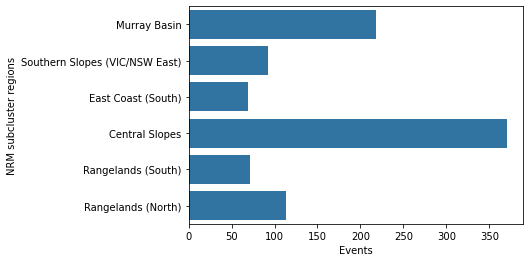

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {'NRM subcluster regions':  ['Murray Basin','Southern Slopes (VIC/NSW East)','East Coast (South)','Central Slopes','Rangelands (South)','Rangelands (North)'],
        'Events': [218,92,69,371,72,113]       
        }

df_nrm = pd.DataFrame(data)

sns.barplot(
    data=df_nrm, x="Events", y="NRM subcluster regions",color='#1F77B4'
    )
plt.savefig('NRM_Regions_8_Nov_22.png',bbox_inches = "tight",dpi = 300)


# Feature importance

c:\Users\sy6sh\Anaconda3\envs\Honours_2022\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Elapsed time to compute the importances: 8.504 seconds


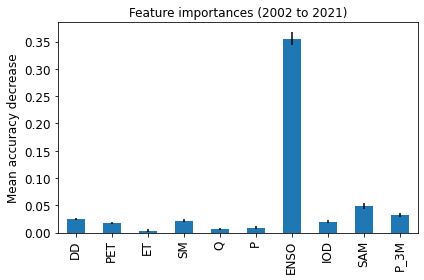

In [4]:
 ## IMPORTING:
# Importing numpy
import numpy as np
import pandas as pd
# For plotting feature importance: 
import matplotlib.pyplot as plt
import time
# For dividing training and testing  
from sklearn.model_selection import train_test_split
#For training the model
from sklearn.ensemble import RandomForestClassifier
# For feature importance plots:
from sklearn.inspection import permutation_importance

# Creating database
database = pd.read_csv('Database_All_AWRA_NDVI_MOf_and_3MPrecip_noWel_SPI_24month_data2022_09_01_11_45.csv')
database.drop(columns = ['Unnamed: 0.3','Unnamed: 0.2','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.6','Unnamed: 0.5','Unnamed: 0.4'],inplace=True)

# Dividing data into predictors (X) and no drought/drought (y)
y = database.iloc[:,7].values #All rows and only the 7th column (Drought no drought)
X = database 
X.drop(['Drought / No Drought'],axis = 1,inplace=True)
#Convert to array
X.to_numpy()

# ----------------------------TRAINING AND RESULTS---------------------------------------------------------------------------------------------------------------------------


# ----------------------------TRAINING DATASET--------------------------------------------
#Dividing data into training and testing: 
# from sklearn.model_selection import train_test_split
# I put it above

X_train_all = X
y_train = y

# Then we create the real X_train and X_test by removing those columns. This allows us to more easily see which ones were an issue. 
X_train = X_train_all.drop(['Year_Month','Latitude','Longitude','Year','Month','Geographic Location','Location','MYD13A3_061__1_km_monthly_EVI','MYD13A3_061__1_km_monthly_NDVI','MYD13A3_061__1_km_monthly_VI_Quality_VI_Usefulness_Description','IPO_TPI'],axis = 1)
# To remove the last 10 rows that include SPI values:
# df.iloc[row_start:row_end , col_start:col_end] 
# Source: https://thispointer.com/pandas-delete-last-column-of-dataframe-in-python/#:~:text=Use%20drop()%20to%20remove,last%20column%20of%20pandas%20dataframe.

X_train = X_train.iloc[:,0:10] 
# Thus I took all rows and columns from 0 to 10 which means it deleted the last SPI rows. But I had to manually count them. 

# --------------------------------TRAINING THE MODEL---------------------------------------------        
# Training the model
# from sklearn.ensemble import RandomForestClassifier # See above
classifier = RandomForestClassifier(n_estimators=20,random_state=0)
classifier.fit(X_train, y_train)

# -------------------------------FEATURE IMPORTANCE TABLES-------------------------------------------
#Preparing variables
#feature_names = [f"feature {i}" for i in range(X_test.shape[1])] 
feature_names = ['DD','PET',	'ET',	'SM',	'Q', 'P','ENSO','IOD','SAM','P_3M']
# To understand this line: https://stackoverflow.com/questions/10200268/what-does-shape-do-in-for-i-in-rangey-shape0
# .shape[] uses 0 as row and 1 as columns. Since X has also month and location data, we need to use X_test as the real number of columns. 

# Making feature importance
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(classifier,X_train,y_train,n_repeats = 10,random_state=0,n_jobs = 2)
# n_repeats = Number of times to permute a feature.; 
# n_jobs = Number of jobs to run in parallel. The computation is done by computing permutation score for each columns and parallelized over the columns. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax,fontsize='12')
ax.set_title("Feature importances (2002 to 2021)",fontsize='12')
ax.set_ylabel("Mean accuracy decrease",fontsize='12')
fig.tight_layout()
plt.show()
#plt.savefig('Feature_importance_rd_state0_7Nov_.png',dpi=300)

C:\Users\sy6sh\AppData\Local\Temp\ipykernel_21244\806816488.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Drought / No Drought'],axis = 1,inplace=True)


Elapsed time to compute the importances: 0.651 seconds


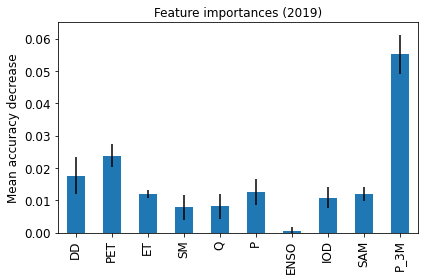

In [5]:
 ## IMPORTING:
# Importing numpy
import numpy as np
import pandas as pd
# For plotting feature importance: 
import matplotlib.pyplot as plt
import time
# For dividing training and testing  
from sklearn.model_selection import train_test_split
#For training the model
from sklearn.ensemble import RandomForestClassifier
# For feature importance plots:
from sklearn.inspection import permutation_importance

# Creating database
database = pd.read_csv('Database_All_AWRA_NDVI_MOf_and_3MPrecip_noWel_SPI_24month_data2022_09_01_11_45.csv')
database.drop(columns = ['Unnamed: 0.3','Unnamed: 0.2','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.6','Unnamed: 0.5','Unnamed: 0.4'],inplace=True)
year = 2019

# Creating database with year 2019 only: https://stackoverflow.com/questions/46878156/pandas-filter-dataframe-rows-with-a-specific-year
database_2019 = database[database['Year'] == year]
database_2019

# Dividing data into predictors (X) and no drought/drought (y)
y = database_2019.iloc[:,7].values #All rows and only the 7th column (Drought no drought)
X = database_2019 
X.drop(['Drought / No Drought'],axis = 1,inplace=True)
#Convert to array
X.to_numpy()

# ----------------------------TRAINING AND RESULTS---------------------------------------------------------------------------------------------------------------------------


# ----------------------------TRAINING DATASET--------------------------------------------
X_train_all = X
y_train = y

# Then we create the real X_train and X_test by removing those columns. This allows us to more easily see which ones were an issue. 
X_train = X_train_all.drop(['Year_Month','Latitude','Longitude','Year','Month','Geographic Location','Location','MYD13A3_061__1_km_monthly_EVI','MYD13A3_061__1_km_monthly_NDVI','MYD13A3_061__1_km_monthly_VI_Quality_VI_Usefulness_Description','IPO_TPI'],axis = 1)
# To remove the last 10 rows that include SPI values:
# df.iloc[row_start:row_end , col_start:col_end] 
# Source: https://thispointer.com/pandas-delete-last-column-of-dataframe-in-python/#:~:text=Use%20drop()%20to%20remove,last%20column%20of%20pandas%20dataframe.

X_train = X_train.iloc[:,0:10] 
# Thus I took all rows and columns from 0 to 10 which means it deleted the last SPI rows. But I had to manually count them. 

# --------------------------------TRAINING THE MODEL---------------------------------------------        
# Training the model
# from sklearn.ensemble import RandomForestClassifier # See above
classifier = RandomForestClassifier(n_estimators=20,random_state=0)
classifier.fit(X_train, y_train)

# -------------------------------FEATURE IMPORTANCE TABLES-------------------------------------------
#Preparing variables
feature_names = ['DD','PET',	'ET',	'SM',	'Q', 'P','ENSO','IOD','SAM','P_3M']
# To understand this line: https://stackoverflow.com/questions/10200268/what-does-shape-do-in-for-i-in-rangey-shape0

# Making feature importance
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(classifier,X_train,y_train,n_repeats = 10,random_state=0,n_jobs = 2)
# n_repeats = Number of times to permute a feature.; 
# n_jobs = Number of jobs to run in parallel. The computation is done by computing permutation score for each columns and parallelized over the columns. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
ax.set(ylim=(0, 0.065)) #https://stackoverflow.com/questions/33227473/how-to-set-the-range-of-y-axis-for-a-seaborn-boxplot

forest_importances.plot.bar(yerr=result.importances_std, ax=ax,fontsize='12')
ax.set_title("Feature importances (2019)",fontsize='12')
ax.set_ylabel("Mean accuracy decrease",fontsize='12')
fig.tight_layout()
plt.show()
#plt.savefig('Feature_importance_rd_state0_2019_7Nov_.png',dpi=300)

# Drought Probability Maps for region of interest from 2017 to 2021

In [5]:
# Importing packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Loading shapefile of NSW
nsw_lga_reduced = gpd.read_file("LocalGovernmentArea.shp")
# Source: https://www.olg.nsw.gov.au/public/find-my-council/local-government-area-boundaries-and-mapping-information/ 
# Reduced with mapshaper.org

# Loading database:
rf_drought_prob = pd.read_csv('RF_Probability_with_Lat_Long_and_All_AWRA_NDVI_MOf_and_3MPrecip_noWel_data_2022_10_07.csv')
# Converting to geodataframe
nsw_locations = gpd.GeoDataFrame(rf_drought_prob, geometry=gpd.points_from_xy(rf_drought_prob.Longitude,rf_drought_prob.Latitude))
#nsw_locations

# I want to create a list that has each timestep i want to put through the function
#Source: https://stackoverflow.com/questions/45989249/pandas-pivot-table-valueerror-index-contains-duplicate-entries-cannot-reshape
series_subset = pd.pivot_table(rf_drought_prob, index = ['Year_Month'], columns = ['Location'], values = ['Probability_of_Drought'])
# series_subset.head()
# Setting the timestamp to be a list of the Year Month index of series subset. 
time_stamp = series_subset.index.tolist()


Creating tuples for drought period - subplots

In [7]:
# Subplots: 2017-2021
# Using list comprehension: https://www.geeksforgeeks.org/python-filter-list-elements-starting-with-given-prefix/
# https://www.geeksforgeeks.org/python-program-to-extract-only-the-numbers-from-a-list-which-have-some-specific-digits/
digit_list = ('2017','2018','2019','2020','2021') #This is a tuple. startswith only takes a tuple of strings
time_stamp_2017_2021 = [x for x in time_stamp if x.startswith(digit_list)]
#time_stamp_2017_2021

digit_list = ('2016','2017','2018','2019','2020','2021') #This is a tuple. startswith only takes a tuple of strings
time_stamp_2016_2021 = [x for x in time_stamp if x.startswith(digit_list)]
#time_stamp_2016_2021

digit_list = ('2016','2017','2018','2019','2020') #This is a tuple. startswith only takes a tuple of strings
time_stamp_2016_2020 = [x for x in time_stamp if x.startswith(digit_list)]
#time_stamp_2016_2021

# Subplots: 2001-2006 or 2009
# Using list comprehension: https://www.geeksforgeeks.org/python-filter-list-elements-starting-with-given-prefix/
# https://www.geeksforgeeks.org/python-program-to-extract-only-the-numbers-from-a-list-which-have-some-specific-digits/
digit_list = ('2001','2002','2003','2004','2005','2006','2007','2008','2009') #This is a tuple. startswith only takes a tuple of strings
time_stamp_2001_2009 = [x for x in time_stamp if x.startswith(digit_list)]
#time_stamp_2001_2009

Creating a tuple with individual year files

In [6]:
digit_list = ('2017') #This is a tuple. startswith only takes a tuple of strings
time_stamp_2017 = [x for x in time_stamp if x.startswith(digit_list)]
digit_list = ('2018') #This is a tuple. startswith only takes a tuple of strings
time_stamp_2018 = [x for x in time_stamp if x.startswith(digit_list)]
digit_list = ('2019') #This is a tuple. startswith only takes a tuple of strings
time_stamp_2019 = [x for x in time_stamp if x.startswith(digit_list)]
digit_list = ('2020') #This is a tuple. startswith only takes a tuple of strings
time_stamp_2020 = [x for x in time_stamp if x.startswith(digit_list)]
digit_list = ('2021') #This is a tuple. startswith only takes a tuple of strings
time_stamp_2021 = [x for x in time_stamp if x.startswith(digit_list)] 

Generating figure from 2017 to 2021

In [ ]:
# create subplots using code based on https://engineeringfordatascience.com/posts/matplotlib_subplots/
fig, axs = plt.subplots(nrows=10, ncols=6,figsize=(35,40)) # 3 is 25,40 #4 worked really well with figsize 30,40 and hspace = 0.-5

plt.subplots_adjust(hspace=0.01)
fig.suptitle("Monthly drought probability", fontsize=40)

# loop through time and axes
times = time_stamp_2017_2021
variable = 'Probability_of_Drought'
for time, ax in zip(times, axs.ravel()):
    # Going through each plot: 
    timestep_nsw_locations = nsw_locations[(nsw_locations.Year_Month == time)]

    # plot on specified axes
    # Plotting base map
    nsw_lga_reduced.plot(ax=ax,color = 'white',edgecolor='black') # Maps with layers: https://geopandas.org/en/stable/docs/user_guide/mapping.html AND https://stackoverflow.com/questions/60516107/plotting-shapely-linestring-and-shapely-geo-point-coordinate-on-same-plot
    # Plotting points
    #timestep_nsw_locations.plot(column=variable, cmap='coolwarm', linewidth=0.8, ax=ax,legend=True,vmin = 0, vmax=1) # I deleted edgecolor = '0.8'))
    timestep_nsw_locations.plot(column=variable, cmap='coolwarm', linewidth=0.8, ax=ax,vmin=0,vmax=1) # I deleted edgecolor = '0.8'))

    # chart formatting
    ax.set_title(time.upper(),fontsize = '20')
    #ax.get_legend().remove()
    ax.set_xlabel("")
    # turn axis off
    ax.axis('off')
    #plt.savefig('Prob_Drought_NSW_map_spring_'+ str(time) +'.png', dpi=300)
    #plt.close()

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=0, vmax=1))
# empty array for the data range
sm.set_array([]) # Changed From here: https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d
# Setting size axes of colorbar: [left, bottom, width, height]
cax = plt.axes([0.90, 0.1, 0.005, 0.8])  #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_adjust.html#sphx-glr-gallery-subplots-axes-and-figures-subplots-adjust-py
# To make sure colorbar doesnt make images smaller: https://stackoverflow.com/questions/62304686/adding-legend-in-geopandas-plot-with-subplots-changes-size-of-plot
# add the colorbar to the figure
cbar = fig.colorbar(sm,cax=cax) # orientation='horizontal') # sm creates the color bar colour,cax put the size of the color bar axes and orientation places it on the bottom

# For location = bottom : https://stackoverflow.com/questions/38487440/python-how-to-make-colorbar-orientation-horizontal
plt.show()
plt.savefig('Prob_Drought_NSW_map_2017_2021_7Nov22.png', dpi=300)
#plt.close()


An example of monthly drought probability figure for the year 2021. This can be repeated by changing:

1. times = time_stamp_[year of interest] and 

2. changing the name of the figure you save. 

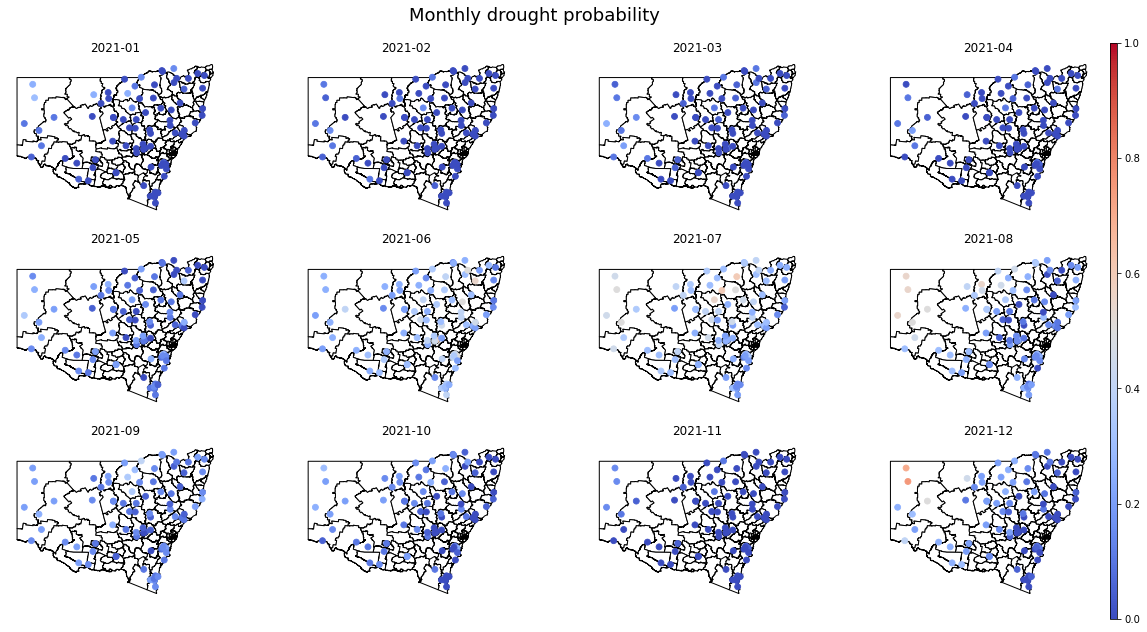

In [9]:
# create subplots based on code from https://engineeringfordatascience.com/posts/matplotlib_subplots/
#fig, axs = plt.subplots(nrows=11, ncols=6,figsize=(20, 30))
fig, axs = plt.subplots(nrows=3, ncols=4,figsize=(20,10))

#plt.subplots_adjust(hspace=0.5)
fig.suptitle("Monthly drought probability", fontsize=18, y=0.95)

# loop through time and axes
times = time_stamp_2021
variable = 'Probability_of_Drought'
for time, ax in zip(times, axs.ravel()):
    # Going through each plot: 
    timestep_nsw_locations = nsw_locations[(nsw_locations.Year_Month == time)]

    # Match crs
    #timestep_nsw_locations = timestep_nsw_locations.to_crs(nsw_lga_2.crs)

    # plot on specified axes
    # Plotting base map
    nsw_lga_reduced.plot(ax=ax,color = 'white',edgecolor='black') # Maps with layers: https://geopandas.org/en/stable/docs/user_guide/mapping.html AND https://stackoverflow.com/questions/60516107/plotting-shapely-linestring-and-shapely-geo-point-coordinate-on-same-plot
    # Plotting points
    #timestep_nsw_locations.plot(column=variable, cmap='coolwarm', linewidth=0.8, ax=ax,legend=True,vmin = 0, vmax=1) # I deleted edgecolor = '0.8'))
    timestep_nsw_locations.plot(column=variable, cmap='coolwarm', linewidth=0.8, ax=ax,vmin=0,vmax=1) # I deleted edgecolor = '0.8'))

    # chart formatting
    ax.set_title(time.upper())
    #ax.get_legend().remove()
    ax.set_xlabel("")
    # turn axis off
    ax.axis('off')
    #plt.savefig('Prob_Drought_NSW_map_spring_'+ str(time) +'.png', dpi=300)
    #plt.close()

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=0, vmax=1))
# empty array for the data range
sm.set_array([]) # Changed From here: https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d
# Setting size axes of colorbar: [left, bottom, width, height]
cax = plt.axes([0.90, 0.1, 0.005, 0.8])  #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_adjust.html#sphx-glr-gallery-subplots-axes-and-figures-subplots-adjust-py
# To make sure colorbar doesnt make images smaller: https://stackoverflow.com/questions/62304686/adding-legend-in-geopandas-plot-with-subplots-changes-size-of-plot
# add the colorbar to the figure
cbar = fig.colorbar(sm,cax=cax) # orientation='horizontal') # sm creates the color bar colour,cax put the size of the color bar axes and orientation places it on the bottom

plt.savefig('Probability_Drought_NSW_map_2021.png', dpi=300)
# For location = bottom : https://stackoverflow.com/questions/38487440/python-how-to-make-colorbar-orientation-horizontal
plt.show()

# Drought probability heatmap

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Zooming in on categories
# Get locations list:
df_prac = pd.read_csv('RF_Probability_Time_Series_7Sept2022.csv', encoding = 'unicode_escape')
df_prac.drop_duplicates(subset = ["Location"],inplace = True)
list_of_locations = df_prac['Location'].tolist()

#Reading in dataframe the timeseries with probability
series = pd.read_csv('RF_Probability_Time_Series_7Sept2022.csv', parse_dates=['Year_Month']) # added parse_dates to fix grouby error
series.drop(['Unnamed: 0','Deep_Drainage', 'PET_Actual', 'E_Actual', 'Soil_M_root_zone', 'Qtot',
       'Rainfall', 'ENSO', 'IOD', 'SAMI', 'P_acc_3M'], axis = 1, inplace = True)
#series.head()     

# Converting Year_Month to Year and Month for merge_left
# Source: https://sparkbyexamples.com/pandas/pandas-extract-month-and-year-separately-from-datetime-column/
series['Year'] = pd.DatetimeIndex(series['Year_Month']).year
series['Month'] = pd.DatetimeIndex(series['Year_Month']).month # This converts it to a number
# Now converting Month to a name: https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name
import calendar
series['Month'] = series['Month'].apply(lambda x: calendar.month_name[x]) # Month_abbr only gave half, so used other solution to see month_name gives full name. 

# Now arranging columns
series = series[['Location','Year','Month','Year_Month','Probability_of_Drought']]
#series
for location in list_of_locations:
       series_subset = series[series['Location'] == location]
       series_subset = series_subset.drop(['Location','Year_Month'],axis =1)

       # Error fix: ValueError: Index contains duplicate entries, cannot reshape
       # Source: https://stackoverflow.com/questions/45989249/pandas-pivot-table-valueerror-index-contains-duplicate-entries-cannot-reshape
       series_subset = pd.pivot_table(series_subset, index = ['Month'], columns = ['Year'], values = ['Probability_of_Drought'])
      
       # Trying to sort out the labels to make it Jan till December because it is currently mixed. 
       # I used this solution: Transpose the rows and then put it back. https://stackoverflow.com/questions/42732565/how-to-shift-several-rows-in-a-pandas-dataframe
       series_subset_t = series_subset.T
       series_subset_t = series_subset_t[['January','February','March','April','May','June','July','August','September','October','November','December']]
       
       # Setting figure size - https://www.statology.org/seaborn-heatmap-size/
       fig, ax = plt.subplots(figsize=(6, 8))
       # Setting yticklabels or else it greats Prob of Drought - Year. Do CHECK BEFORE HAND WHAT IT IS to make sure you are saving it correctly
       ylabels = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
       # Creating heatmap with Annotations, width of lines around cells, colourmap
       sns.heatmap(series_subset_t,yticklabels = ylabels,linewidths=.5,cmap ="coolwarm",vmin=0, vmax=1).set(title='Probability of Drought in '+str(location),ylabel = 'Year')
       #sns.heatmap(series_subset_t,linewidths=.5,cmap ="coolwarm").set(title='Probability of Drought in '+str(location))
       plt.savefig('Prob_fig_'+ str(location) + '_2_9Nov2022.png',bbox_inches = "tight",dpi = 300)
       plt.close()

Example of individual heatmap

[Text(0.5, 1.0, 'Probability of Drought in Wagga Wagga'),
 Text(33.0, 0.5, 'Year')]

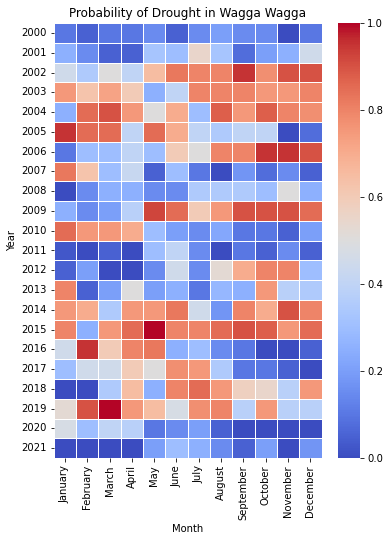

In [4]:
series_subset = series[series['Location'] == 'Wagga Wagga']
series_subset = series_subset.drop(['Location','Year_Month'],axis =1)

# Error fix: ValueError: Index contains duplicate entries, cannot reshape
# Source: https://stackoverflow.com/questions/45989249/pandas-pivot-table-valueerror-index-contains-duplicate-entries-cannot-reshape
series_subset = pd.pivot_table(series_subset, index = ['Month'], columns = ['Year'], values = ['Probability_of_Drought'])
# Annotations, width of lines around cells, colourmap
# Trying to sort out the labels to make it Jan till December because it is currently mixed. 
# I used this solution: Transpose the rows and then put it back. https://stackoverflow.com/questions/42732565/how-to-shift-several-rows-in-a-pandas-dataframe
series_subset_t = series_subset.T
series_subset_t = series_subset_t[['January','February','March','April','May','June','July','August','September','October','November','December']]
series_subset = series_subset_t.T

# Setting figure size - https://www.statology.org/seaborn-heatmap-size/
fig, ax = plt.subplots(figsize=(6, 8))
# Setting yticklabels or else it greats Prob of Drought - Year. Do CHECK BEFORE HAND WHAT IT IS to make sure you are saving it correctly
ylabels = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
# Creating heatmap
sns.heatmap(series_subset_t,yticklabels = ylabels,linewidths=.5,cmap ="coolwarm").set(title='Probability of Drought in '+str('Wagga Wagga'),ylabel = 'Year')
